In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from utils.metrics import partsMetrics,allMetrics
from utils.plots import exp_vs_predict

In [3]:
df=pd.read_csv('processed_outliers.csv')
print('Data shape:',df.shape)

Data shape: (519, 7)


In [4]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X.shape)
print(y.shape)

(519, 6)
(519,)


In [6]:
param_grid={
    'alpha': np.logspace(-10,1,12)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def train_model(X_train,y_train):
    reg = GaussianProcessRegressor(random_state=0)
    grid=GridSearchCV(reg,param_grid,cv=5,scoring=make_scorer(r2_score),n_jobs=2)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    return grid

In [7]:
model=train_model(X_train,y_train)

{'alpha': 0.01}
0.8862518252547134


In [5]:
best_params={'alpha': 0.01}
reg=GaussianProcessRegressor(**best_params,random_state=0)
partsMetrics(df,reg)

train rmse: 0.7783391436830772
val rmse: 4.299259575248027
test rmse: 3.148648397736211

train si: 0.06346002109948533
val si: 0.3507771895437154
test si: 0.226255395125106

train r2: 0.9959205684337248
val r2: 0.8887527536798996
test r2: 0.9516542015061149

train mape: 25.998994716845917
val mape: 56.086676361866786
test mape: 123.37515303152102


In [6]:
allMetrics(df,reg)

all rmse: 0.7842322607477838
all si: 0.06309740530783665
all r2: 0.9960979116325794
all mape: 26.644354973779897


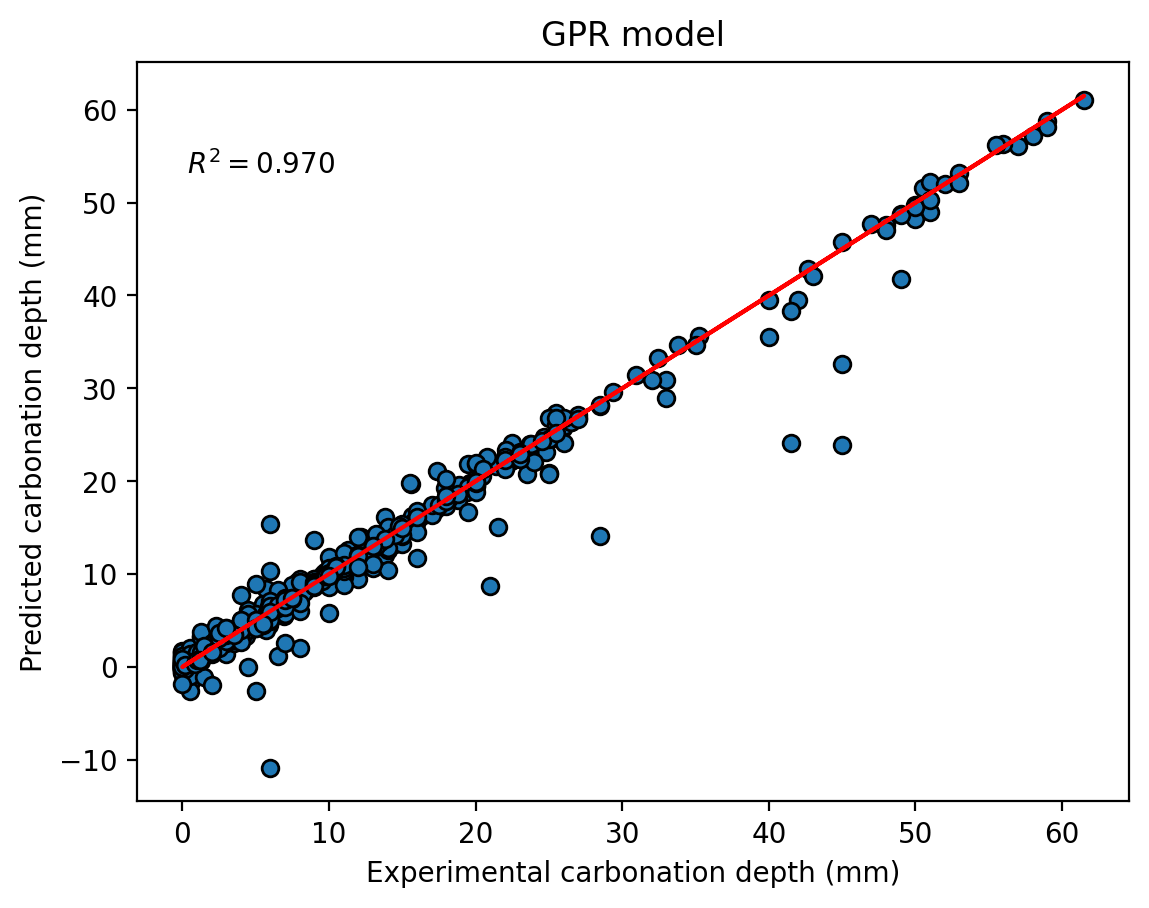

In [7]:
exp_vs_predict(df,reg,'GPR model')